In [1]:
# load libraies

%run py_libraries.py

/Users/4476224/.local/lib/python3.8/site-packages/tensorflow_addons/utils/ensure_tf_install.py:53: UserWarning: Tensorflow Addons supports using Python ops for all Tensorflow versions above or equal to 2.6.0 and strictly below 2.9.0 (nightly versions are not supported). 
 The versions of TensorFlow you are currently using is 2.13.0 and is not supported. 
Some things might work, some things might not.
If you were to encounter a bug, do not file an issue.
If you want to make sure you're using a tested and supported configuration, either change the TensorFlow version or the TensorFlow Addons's version. 
You can find the compatibility matrix in TensorFlow Addon's readme:
https://github.com/tensorflow/addons
  warnings.warn(


Instructions for updating:
non-resource variables are not supported in the long term


In [2]:
# loading utility files

from utility.sv_fig import savefig
from utility.make_cm import make_confusion_matrix
from utility.get_g_result import get_gamma_results
from utility.plt_result import plot_results

In [3]:
def savefig(filename, crop = True):
    plt.savefig('{}.pdf'.format(filename))

In [4]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_row', None)

# load data
# X_train = pd.read_csv('data/norm_X_train_NCa_Ca.csv')
# y_train = pd.read_csv('data/y_train_NCa_Ca.csv')

data = pd.read_csv('data/Xy_NCa_Ca_md.csv')

print(data.shape)

(91, 38)


In [5]:
all_col_names = data.columns.tolist()

print(all_col_names)

['ENA.78', 'IFN.y', 'IL.10', 'IL.6', 'IL.8', 'MCP.1', 'MDC', 'MIP.1a', 'TNF.a', 'C.peptide', 'G.CSF', 'IL.22', 'Insulin', 'Leptin', 'MIP.3a', 'GRO.a', 'HGF', 'MMP.2', 'Adiponectin', 'CRP', 'GDF.15', 'TIMP.1', 'TGF.B2', 'TGF.B1', 'PPAR.y', 'HIF.1a', 'Laminin', 'HbA1c', 'CA19.9', 'Glucose', 'HDL', 'CCK', 'LDL', 'Triglyceride', 'Albumin', 'Lumican', 'ZAG', 'CACHEXSTAGE0VIG']


In [6]:
col_names = all_col_names[:-1]

print(col_names)

['ENA.78', 'IFN.y', 'IL.10', 'IL.6', 'IL.8', 'MCP.1', 'MDC', 'MIP.1a', 'TNF.a', 'C.peptide', 'G.CSF', 'IL.22', 'Insulin', 'Leptin', 'MIP.3a', 'GRO.a', 'HGF', 'MMP.2', 'Adiponectin', 'CRP', 'GDF.15', 'TIMP.1', 'TGF.B2', 'TGF.B1', 'PPAR.y', 'HIF.1a', 'Laminin', 'HbA1c', 'CA19.9', 'Glucose', 'HDL', 'CCK', 'LDL', 'Triglyceride', 'Albumin', 'Lumican', 'ZAG']


In [7]:
# corelation feature and target

ndata_nwy = data

print(ndata_nwy.shape)

X_cor = ndata_nwy.drop('CACHEXSTAGE0VIG', axis=1)
# X_cor = X_cor.drop('DATSTAT_ALTPID', axis=1)

# convert column "CACHEXSTAGE0VIG" of Ndata to numerics
ndata_nwy['CACHEXSTAGE0VIG'] = pd.to_numeric(ndata_nwy['CACHEXSTAGE0VIG'])
y_cor = ndata_nwy['CACHEXSTAGE0VIG']


# print(y_cor)
# print(X_cor)

feat_cols = list(X_cor.columns)

feat_cor_targ = r_regression(X_cor, y_cor, center=True, force_finite=True)
feat_cor_targ = list(feat_cor_targ)

# print(feat_cols)
# print(feat_cor_targ)

print("Corelation with CACHEX_STAGE_0_VIG")
for feature in zip(feat_cols, feat_cor_targ):
    print(feature)



(91, 38)
Corelation with CACHEX_STAGE_0_VIG
('ENA.78', -0.035648335001554954)
('IFN.y', 0.11771652415540036)
('IL.10', 0.18141418212231994)
('IL.6', 0.19714870183637798)
('IL.8', 0.3003840755856385)
('MCP.1', 0.14612958921640778)
('MDC', 0.10677803136056449)
('MIP.1a', -0.012156790104097055)
('TNF.a', 0.30187416426537667)
('C.peptide', -0.0017393425065440242)
('G.CSF', 0.07187460617958492)
('IL.22', 0.34762604346702114)
('Insulin', -0.10211702113699861)
('Leptin', -0.199175897686102)
('MIP.3a', 0.25105901292193844)
('GRO.a', 0.22634859341185753)
('HGF', 0.3144384038505625)
('MMP.2', 0.12668163557267728)
('Adiponectin', -0.015344346996834221)
('CRP', 0.32901680279408463)
('GDF.15', 0.3964443888819873)
('TIMP.1', 0.3297583779329429)
('TGF.B2', 0.14809430564533063)
('TGF.B1', 0.10560536391695803)
('PPAR.y', 0.05549157223081341)
('HIF.1a', -0.10400217307444082)
('Laminin', 0.09651254545644442)
('HbA1c', -0.07538776067016509)
('CA19.9', -0.04424180874799196)
('Glucose', 0.06652305561058738)

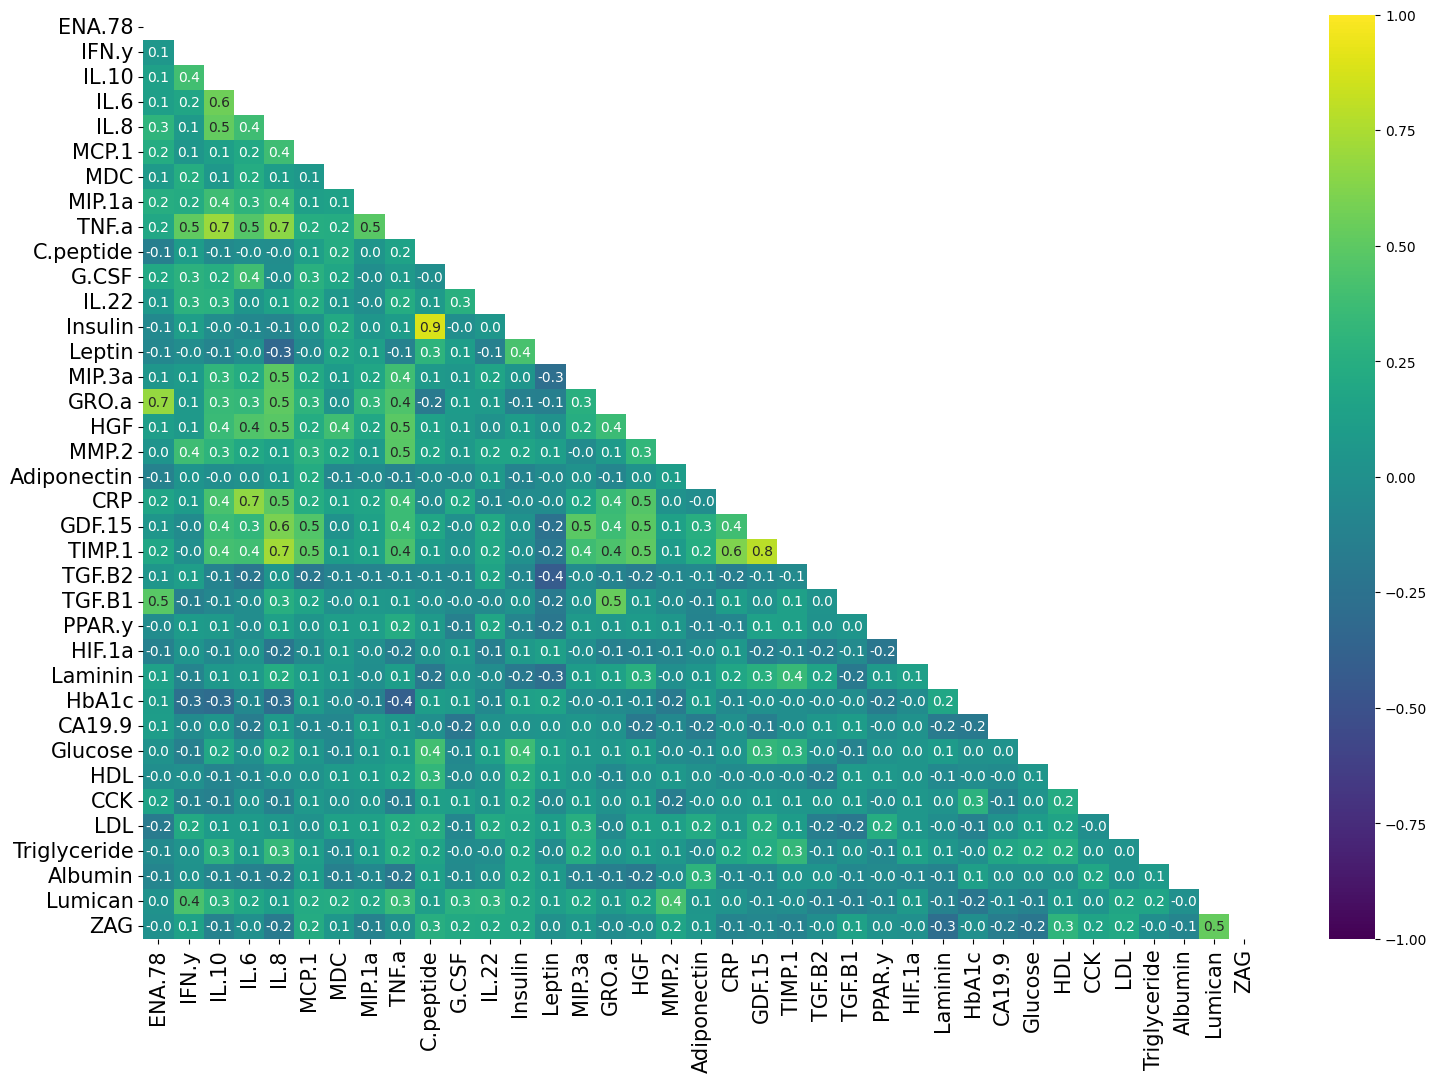

In [8]:

# Convert to pandas dataframe 
df_data = pd.DataFrame(data=data, 
                    columns=col_names)

plt.figure(figsize=(18, 12))
corr = df_data.corr() 
mask = np.tri(*corr.shape).T 

ax = sns.heatmap(corr, vmax=1, vmin=-1, mask=mask, annot=True, cmap='viridis', fmt=".1f", annot_kws={"size": 10})


# Adjust the font size of the x and y tick labels
ax.set_xticklabels(ax.get_xticklabels(), fontsize=15)
ax.set_yticklabels(ax.get_yticklabels(), fontsize=15)

savefig('./figs/NCa_Ca_p_corr')

# # Optional: Add axis titles with specific font sizes
# plt.xlabel("X Axis Label", fontsize=14)
# plt.ylabel("Y Axis Label", fontsize=14)
